<a href="https://colab.research.google.com/github/jr2ngb2/Movie_Success_Prediction/blob/master/Copy_of_datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import re
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from requests import get
import unicodedata
from bs4 import BeautifulSoup
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import sys


%matplotlib inline

In [0]:
cd /content

/content


In [0]:
!git clone https://github.com/aseem96/Movie-Success-Predictor.git

Cloning into 'Movie-Success-Predictor'...
remote: Enumerating objects: 31, done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 31
Unpacking objects: 100% (31/31), done.


In [0]:
cd Movie-Success-Predictor

/content/Movie-Success-Predictor


In [0]:
df = pd.read_csv('movie_metadata.csv')

In [0]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [0]:
df.shape

(5043, 28)

In [0]:
def classify(col):
    if col['imdb_score'] >= 0 and col['imdb_score'] < 4:
        return 0
    elif col['imdb_score'] >= 4 and col['imdb_score'] < 6:
        return 1
    elif col['imdb_score'] >= 6 and col['imdb_score'] < 7:
        return 2
    elif col['imdb_score'] >= 7 and col['imdb_score'] < 8:
        return 3
    elif col['imdb_score'] >= 8 and col['imdb_score'] <= 10:
        return 4

In [0]:
df['Success'] = df.apply(classify, axis=1)

In [0]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Success
count,4927.000000,4959.000000,4872.000000,4953.000000,4968.000000,4.104000e+03,4.974000e+03,4974.000000,4961.000000,4956.000000,4.494000e+03,4869.000000,4963.000000,4974.000000,4654.000000,4974.000000,4974.000000
mean,140.572965,107.193991,691.233990,647.790430,6573.525765,4.862765e+07,8.382561e+04,9729.287495,1.372707,273.584746,3.998652e+07,2002.487985,1660.086641,6.439767,2.223350,7572.120828,2.096301
std,121.858265,24.977939,2822.022077,1672.724849,15077.147622,6.853339e+07,1.386775e+05,18228.145064,2.017257,378.750005,2.073754e+08,12.433410,4055.957071,1.124002,1.393249,19422.681479,0.957457
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000
25%,50.000000,93.000000,7.000000,135.000000,617.000000,5.480826e+06,8.688250e+03,1430.250000,0.000000,65.000000,6.000000e+06,1999.000000,284.000000,5.800000,1.850000,0.000000,1.000000
50%,110.000000,103.000000,49.000000,372.000000,989.000000,2.559138e+07,3.450400e+04,3097.500000,1.000000,157.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,165.500000,2.000000
75%,195.000000,118.000000,197.000000,636.000000,11000.000000,6.241428e+07,9.646275e+04,13808.750000,2.000000,327.000000,4.500000e+07,2011.000000,919.000000,7.200000,2.350000,3000.000000,3.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,4.000000


In [0]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Success
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,3.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,3.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,2.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,4.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0,3.0


In [0]:
def fill_nan(col):
    df[col] = df[col].fillna(df[col].median())

cols = list(df.columns)
fill_nan(cols)

In [0]:
def clean_backward_title(col):
    string = col.rstrip()[:-2]
    return unicodedata.normalize('NFD', unicode(string, 'utf-8')).encode('ascii', 'ignore')

In [0]:
df['movie_title'] = df['movie_title'].astype(str)

In [0]:
df['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
5                                            John Carter 
6                                           Spider-Man 3 
7                                                Tangled 
8                                Avengers: Age of Ultron 
9                 Harry Potter and the Half-Blood Prince 
10                    Batman v Superman: Dawn of Justice 
11                                      Superman Returns 
12                                     Quantum of Solace 
13            Pirates of the Caribbean: Dead Man's Chest 
14                                       The Lone Ranger 
15                                          Man of Steel 
16              The Chronicles of Narnia: Prince Caspian 
17            

In [0]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Success
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.00000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,139.869720,107.124132,669.456871,642.868531,6490.47214,4.433833e+07,8.315077e+04,9638.549177,1.366647,271.573468,3.781071e+07,2002.574658,1643.190561,6.441959,2.233119,7470.780984,2.094983
std,120.535511,24.774814,2776.189759,1658.130651,14979.85268,6.247029e+07,1.378445e+05,18119.377709,2.001342,375.774914,1.958590e+08,12.225589,4025.851655,1.116440,1.338851,19308.507567,0.950949
min,1.000000,7.000000,0.000000,0.000000,0.00000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000
25%,51.000000,93.000000,8.000000,139.500000,625.00000,9.116578e+06,8.972500e+03,1442.000000,0.000000,67.000000,7.500000e+06,1999.000000,290.000000,5.800000,1.850000,0.000000,1.000000
50%,110.000000,103.000000,49.000000,372.000000,989.00000,2.559138e+07,3.450400e+04,3097.500000,1.000000,157.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,165.500000,2.000000
75%,192.000000,117.000000,188.000000,633.000000,11000.00000,5.089081e+07,9.444550e+04,13629.500000,2.000000,322.000000,4.000000e+07,2010.000000,912.000000,7.200000,2.350000,3000.000000,3.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.00000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,4.000000


In [0]:
from sklearn.preprocessing import MinMaxScaler
col = list(df.describe().columns)
col.remove('Success')
sc = StandardScaler()
# sc = MinMaxScaler()
temp = sc.fit_transform(df[col])
df[col] = temp
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,imdb_score,aspect_ratio,movie_facebook_likes,Success,pca_one,pca_two,pca_three,cluster,predictions,class
0,Color,James Cameron,4.838309,2.861087,-0.241166,0.127947,Joel David Moore,-0.366560,11.465267,Action|Adventure|Fantasy|Sci-Fi,...,1.306103,-0.338472,1.322306,3.0,5.447729,-4.851715,-1.261230,0.213817,0.0,0.951793
1,Color,Gore Verbinski,1.345216,2.497779,-0.038350,0.215403,Orlando Bloom,2.237195,4.243491,Action|Adventure|Fantasy,...,0.589468,0.087308,-0.386955,3.0,2.781054,-0.180145,0.820510,0.213817,0.0,0.951793
2,Color,Sam Mendes,3.834356,1.650060,-0.241166,-0.290638,Rory Kinnear,0.301069,2.493206,Action|Adventure|Thriller,...,0.320731,0.087308,4.015686,2.0,2.424623,-1.779965,-2.138682,-0.414550,0.0,-0.099892
3,Color,Christopher Nolan,5.585051,2.295941,7.684150,13.484672,Christian Bale,1.369277,6.464391,Action|Thriller,...,1.843579,0.087308,8.107553,4.0,9.900426,0.497381,-0.757605,0.213817,0.0,2.003478
4,NaN,Doug Walker,-0.247833,-0.166481,-0.193975,-0.163374,Rob Walker,-0.424577,-0.300124,Documentary,...,0.589468,0.087308,-0.386955,3.0,-0.476084,-0.327328,0.009013,0.842184,0.0,0.951793


In [0]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df[col])

In [0]:
df_pca

array([[11.5050017 , -7.00095824, -1.48024396],
       [ 5.87327873, -0.25994658,  0.96299245],
       [ 5.1205364 , -2.56846481, -2.51006723],
       ...,
       [-1.83002128,  0.14915836, -0.78085623],
       [-1.56035582,  0.69199714, -0.59349523],
       [-1.64527239, -0.15957308,  0.02482309]])

In [0]:
pca.explained_variance_ratio_

array([0.27875487, 0.13013809, 0.0860911 ])

In [0]:
df['pca_one'] = df_pca[:, 0]
df['pca_two'] = df_pca[:, 1]
df['pca_three'] = df_pca[:, 2]

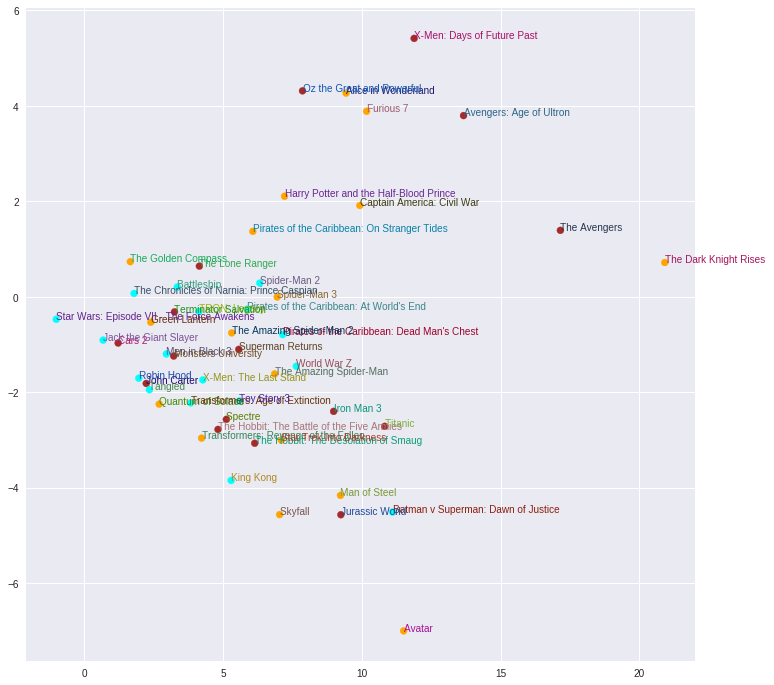

In [0]:
plt.figure(figsize=(12,12))
plt.scatter(df['pca_one'][:50], df['pca_two'][:50], color=['orange', 'cyan', 'brown'], cmap='viridis')

for m, p1, p2 in zip(df['movie_title'][:50], df['pca_one'][:50], df['pca_two'][:50]):
    plt.text(p1, p2, s=m, color=np.random.rand(3)*0.7)

In [0]:
km = KMeans(n_clusters = 5)

In [0]:
#P_fit = km.fit(df[['gross','imdb_score','num_critic_for_reviews','director_facebook_likes','actor_1_facebook_likes','movie_facebook_likes','actor_3_facebook_likes','actor_2_facebook_likes']])
P_fit = km.fit(df[['gross','imdb_score']])
P_fit.labels_
# colormap = {0:'red',1:'green',2:'blue'}
# lc =  [colormap[c] for c in colormap]
# plt.scatter(df['pca_one'],df['pca_two'],c = lc)


array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

In [0]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
df['cluster'] = P_fit.labels_

In [0]:
correct = 0
print(len(df))
print(df.iloc[0])
for i in range(len(df)):
    predict_me = np.array(df[['gross','imdb_score']].iloc[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = km.predict(predict_me)
    if prediction[0] == df['Success'].iloc[i]:
        correct += 1

print(correct/len(df))

5043
color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                 4.83831
duration                                                               2.86109
director_facebook_likes                                              -0.241166
actor_3_facebook_likes                                                0.127947
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                -0.36656
gross                                                                  11.4653
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
movie_title                                                            Avatar 
num_voted_users                                

In [0]:
np.unique(P_fit.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [0]:
df[['movie_title','Success','cluster']]

,movie_title,Success,cluster
0,Avatar,3.0,2
1,Pirates of the Caribbean: At World's End,3.0,2
2,Spectre,2.0,1
3,The Dark Knight Rises,4.0,2
4,Star Wars: Episode VII - The Force Awakens ...,3.0,3
5,John Carter,2.0,0
6,Spider-Man 3,2.0,2
7,Tangled,3.0,1
8,Avengers: Age of Ultron,3.0,2
9,Harry Potter and the Half-Blood Prince,3.0,2


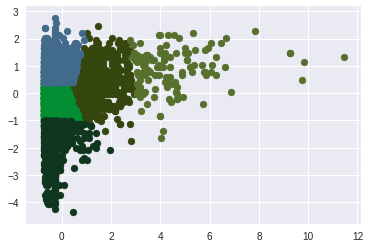

In [0]:
for i in np.unique(P_fit.labels_):
    temp = df[df['cluster'] == i]
    plt.scatter(temp['gross'], temp['imdb_score'], color=np.random.rand(3)*0.7)

In [0]:
cols3 = ['director_facebook_likes','imdb_score']

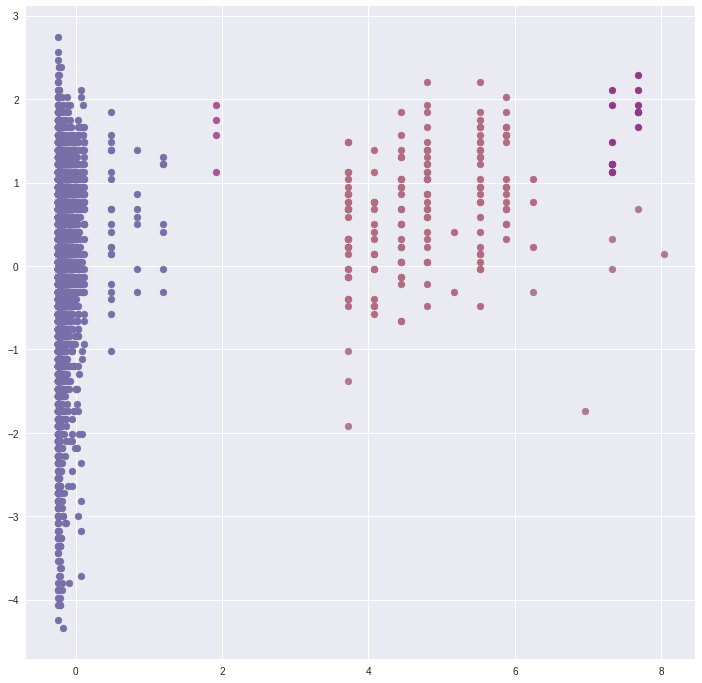

In [0]:
#The min_pts are taken as >= D+1 and the eps value is estimated from the elbow in k-distance graph
db = DBSCAN(eps = .5, min_samples=3).fit(df[cols3])
len(db.core_sample_indices_)
df['cluster'] = db.labels_
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(db.labels_)))]
plt.figure(figsize= (12,12))
for i in np.unique(db.labels_):
    temp = df[df['cluster'] == i]
    plt.scatter(temp['director_facebook_likes'], temp['imdb_score'], color = np.random.rand(3)*0.7)

In [0]:
features = col

In [0]:
features.remove('imdb_score')

In [0]:
features

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'movie_facebook_likes']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Success'], test_size=0.2)

In [0]:
# rf = RandomForestClassifier(random_state=1, n_estimators=250, min_samples_split=8, min_samples_leaf=4)

# rf = GradientBoostingClassifier(random_state=0, n_estimators=250, min_samples_split=8, 
#                                min_samples_leaf=4, learning_rate=0.1)

rf = xgb.XGBClassifier(n_estimators=250)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
predictions = predictions.astype(int)

In [0]:
np.unique(predictions)

array([0, 1, 2, 3, 4])

In [0]:
#predictions = rf.predict(X_train + X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
len(predictions)

1009

In [0]:
#f['predictions'] = predictions

In [0]:
X_test['Success'] = y_test[:]
X_test
X_test['predictions'] = predictions[:]
X_test

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Success,predictions
1374,1.395682,0.698040,3.264763,-0.241166,-0.223689,-0.380847,-0.350399,1.145457,-0.426798,-0.183219,3.101703,-0.004140,-0.292420,-0.252938,0.087308,0.286390,4.0,4
3326,0.589468,-1.019466,0.600503,-0.238284,-0.352159,-0.421706,-0.300124,-0.561629,-0.504513,5.313639,-0.618978,-0.147114,0.607421,-0.381123,0.087308,-0.386955,3.0,3
821,-1.381276,-0.720770,0.479400,-0.186049,6.246889,0.367832,-0.300124,-0.407251,1.464238,1.315924,-0.342189,-0.090945,1.016440,2.324412,0.087308,-0.386955,1.0,1
2202,0.231151,-0.853524,0.802341,-0.235402,-0.147089,-0.395602,-0.142730,-0.464517,-0.436236,-0.183219,-0.310252,-0.090945,-0.456028,-0.298647,0.087308,-0.386955,2.0,2
2757,0.320731,-0.281022,0.519768,0.119075,0.187659,1.502802,0.032025,0.613790,1.333095,0.316496,0.623910,-0.119030,-0.537832,-0.159781,0.087308,0.131003,2.0,2
66,2.291475,4.191133,1.811530,7.684150,6.246889,1.102225,7.828141,11.557779,2.658382,-0.682933,11.698126,0.751581,0.443813,2.821250,0.087308,1.529489,4.0,4
2121,-0.575063,-0.347399,-0.126114,-0.189291,-0.212832,-0.370633,-0.378929,-0.481168,-0.396606,0.816210,-0.579057,-0.080733,0.443813,-0.190833,0.087308,-0.351371,1.0,1
3958,1.037365,-0.878415,2.457411,-0.241166,-0.346128,-0.385721,-0.300124,-0.557551,-0.446944,-0.682933,-0.379450,-0.172645,-2.501122,-0.246976,0.087308,-0.386955,3.0,3
204,1.574841,-1.152221,0.519768,-0.231079,-0.380507,-0.397004,-0.300124,-0.600568,-0.493418,-0.682933,-0.688176,-0.090945,1.098243,-0.381868,0.087308,-0.386955,4.0,4
893,1.126944,0.515503,0.640870,-0.196136,0.115884,0.234306,0.410052,1.085093,0.280857,-0.183219,0.871423,0.087772,0.443813,0.337058,0.087308,0.959735,3.0,3


In [0]:
accuracy_score(y_test, predictions)

1.0

In [0]:
features.insert(0, 'imdb_score')

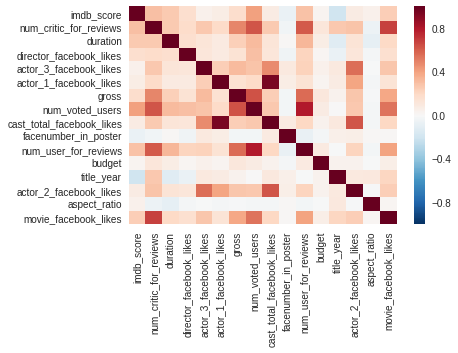

In [0]:
sns.heatmap(df[features].corr())

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from split_dataset import split_train_test
import numpy as np
import matplotlib.pyplot as plt

def plot_data(neighbors, MSE):
    plt.plot(neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

def run_knn(df_knn):
    print("\n\n----------------------K Nearest Neighbors----------------------\n\n")

    x = np.array(df_knn.iloc[:, 0:])
    y = np.array(df_knn['class'])

    x_train, x_test, y_train, y_test = split_train_test(x,y)

    neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
    cv_scores = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    MSE = [1 - x for x in cv_scores]
    optimal_k = neighbors[MSE.index(min(MSE))]
    print ("The optimal number of neighbors is %d" % optimal_k)

    plot_data(neighbors, MSE)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Success'], test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=50)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [0]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9940535183349851


In [0]:
X_test['Predictions'] = y_pred[:]

In [0]:
X_test

,gross,imdb_score,class,Predictions
2328,-0.683459,-3.262442,0.0,0.0
4484,-0.300124,0.141572,2.0,2.0
1995,-0.644754,-1.112538,1.0,1.0
3794,-0.300124,-0.216745,2.0,2.0
2244,-0.335306,-0.127166,2.0,2.0
772,-0.109800,0.858206,3.0,3.0
1024,-0.547532,-0.395904,2.0,2.0
2993,-0.681336,0.589468,3.0,3.0
2879,-0.660859,0.768627,3.0,3.0
2930,-0.075095,0.947786,3.0,3.0


In [0]:
pwd

'/content/Movie-Success-Predictor'

In [0]:
cd src

/content/Movie-Success-Predictor/src


In [0]:
!ls

data  init.py  model  playground  visualize


In [0]:
cd model

/content/movie-mining/src/model


In [0]:
cd  ..

/content/movie-mining/src


In [0]:
cd data

/content/movie-mining/src/data


In [0]:
!python preprocess_data.py

Traceback (most recent call last):
  File "preprocess_data.py", line 37, in <module>
    credit = pd.read_csv("../../data/raw/credits.csv", index_col=2)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 709, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 449, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 818, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1049, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1695, in __init__
    self._reader = parsers.TextReader(src, **kwds)
  File "pandas/_libs/parsers.pyx", line 402, in pandas._libs.parsers.TextReader.__cinit__
  File "pandas/_libs/parsers.pyx", line 718, in pan